# Neural networks

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np

In [2]:
orig_X, y = fetch_openml("mnist_784", version=1, return_X_y=True,
                         as_frame=False, parser="pandas")
orig_X.shape, y.shape, np.min(orig_X), np.max(orig_X)

((70000, 784), (70000,), 0, 255)

5


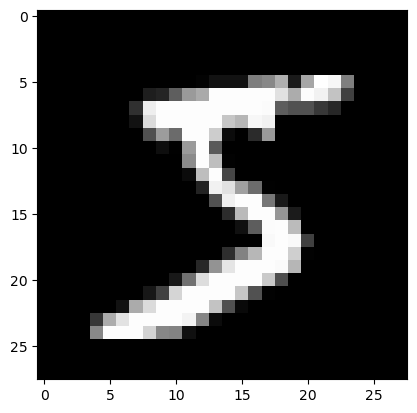

In [3]:
print(y[0])
plt.imshow(orig_X[0].reshape((28,28)), cmap="gray", vmin=0, vmax=255)

In [4]:
X = orig_X / 255

np.max(X)

1.0

5


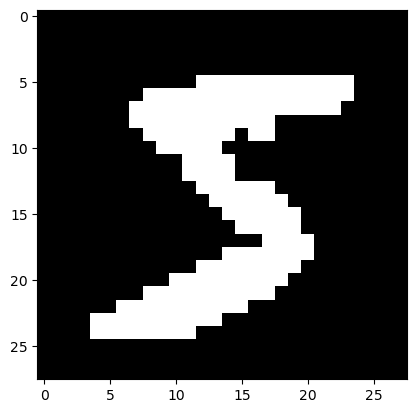

In [5]:
print(y[0])
plt.imshow(orig_X[0].reshape((28,28)), cmap="gray", vmin=0.0, vmax=1.0)

In [6]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver="sgd", verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [10]:
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print("\n",mlp.score(X_test, y_test))

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
0.9868

 0.97


C:\Users\mapma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
[coef.shape for coef in mlp.coefs_]

[(784, 50), (50, 10)]